In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
data=pd.read_csv('power.csv')

In [52]:
df=pd.DataFrame(data)

In [53]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.shape

(908, 25)

The dataset has 908 rows and 25 columns

In [55]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Gives the data type of each column

In [57]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

There are lot of null values in the dataset

# Removing Null values

In [58]:
df['latitude'].fillna(df['latitude'].value_counts().idxmax(), inplace=True)
df['longitude'].fillna(df['longitude'].value_counts().idxmax(), inplace=True)
df['other_fuel1'].fillna(df['latitude'].value_counts().idxmax(), inplace=True)
df['other_fuel2'].fillna(df['other_fuel2'].value_counts().idxmax(), inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].value_counts().idxmax(), inplace=True)
df['owner'].fillna(df['owner'].value_counts().idxmax(), inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].value_counts().idxmax(), inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].value_counts().idxmax(), inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].value_counts().idxmax(), inplace=True)


In [59]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

The null values are removed but the columns wepp_id,estimated_generation_gwh,other_fuel3 does not have an data.

# Dropping the columns wepp_id,estimated_generation_gwh,other_fuel3 does not have an data.

In [60]:
df.drop(['other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [61]:
df.shape

(908, 22)

The dataset has 22 columns after dropping the columns

In [62]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
other_fuel2                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

# Encoding the Object columns

In [63]:
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['country_long']=le.fit_transform(df['country_long'])
df['name']=le.fit_transform(df['name'])
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

df['other_fuel2']=le.fit_transform(df['other_fuel2'])

df['owner']=le.fit_transform(df['owner'])

df['source']=le.fit_transform(df['source'])
df['url']=le.fit_transform(df['url'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])

In [64]:
df.dtypes

country                     int32
country_long                int32
name                        int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                object
other_fuel2                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int32
dtype: object

Columns after encoding the columns

In [65]:
df.drop(['other_fuel1'],axis=1,inplace=True)

Dropping the column other_fuel1

# Detecting Outliers

country                       AxesSubplot(0.125,0.71587;0.110714x0.16413)
country_long               AxesSubplot(0.257857,0.71587;0.110714x0.16413)
name                       AxesSubplot(0.390714,0.71587;0.110714x0.16413)
gppd_idnr                  AxesSubplot(0.523571,0.71587;0.110714x0.16413)
capacity_mw                AxesSubplot(0.656429,0.71587;0.110714x0.16413)
latitude                   AxesSubplot(0.789286,0.71587;0.110714x0.16413)
longitude                    AxesSubplot(0.125,0.518913;0.110714x0.16413)
primary_fuel              AxesSubplot(0.257857,0.518913;0.110714x0.16413)
other_fuel2               AxesSubplot(0.390714,0.518913;0.110714x0.16413)
commissioning_year        AxesSubplot(0.523571,0.518913;0.110714x0.16413)
owner                     AxesSubplot(0.656429,0.518913;0.110714x0.16413)
source                    AxesSubplot(0.789286,0.518913;0.110714x0.16413)
url                          AxesSubplot(0.125,0.321957;0.110714x0.16413)
geolocation_source        AxesSubplot(

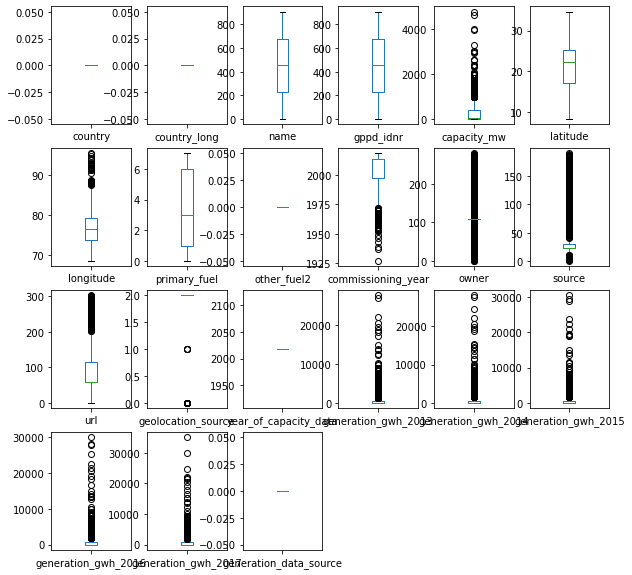

In [66]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(10,10))

# Checking skewness

In [67]:
df.skew()

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               3.193257
latitude                 -0.213428
longitude                 1.118449
primary_fuel              0.471141
other_fuel2               0.000000
commissioning_year       -1.779021
owner                     1.020935
source                    1.829145
url                       1.512258
geolocation_source       -2.161710
year_of_capacity_data     0.000000
generation_gwh_2013       5.158053
generation_gwh_2014       4.989441
generation_gwh_2015       5.264211
generation_gwh_2016       4.988235
generation_gwh_2017       4.983065
generation_data_source    0.000000
dtype: float64

Most of the columns have skewness but not considering the outliers and skewness for object columns

In [68]:
df.drop(['country','country_long','name','gppd_idnr','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

Dropping the columns

In [69]:
df.shape

(908, 15)

# Checking Collinearity

<AxesSubplot:>

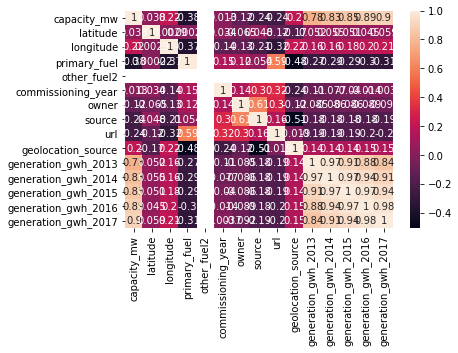

In [70]:
sns.heatmap(df.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

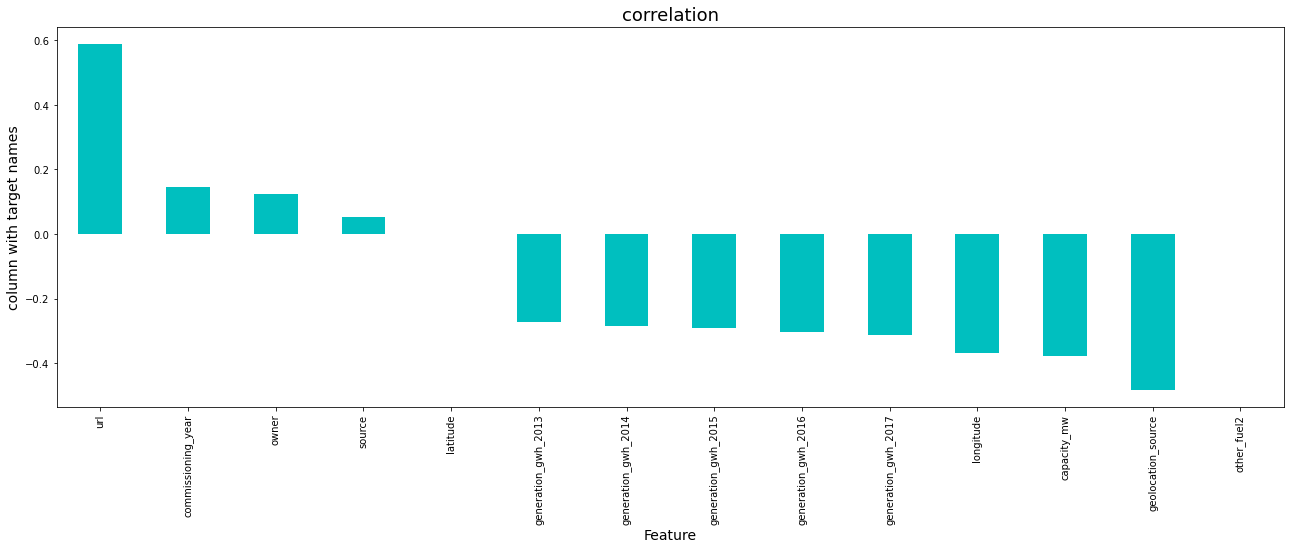

In [22]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

The heatmap shows that the lighter shades are highly correlated and the graph shows positively and negatively related columns to the target variable primary_fuel 

# Splitting the input and target variable

In [71]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [72]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [73]:
calc_vif(x)

,variables,VIF FACTOR
0,capacity_mw,7.547611
1,latitude,14.004679
2,longitude,292.506065
3,other_fuel2,NaN
4,commissioning_year,326.012856
5,owner,11.753970
6,source,4.662795
7,url,3.682472
8,geolocation_source,11.597301
9,generation_gwh_2013,29.045752


In [74]:
x=df.drop(['commissioning_year'],axis=1)

In [75]:
calc_vif(x)

,variables,VIF FACTOR
0,capacity_mw,7.715674
1,latitude,13.282369
2,longitude,47.393212
3,primary_fuel,9.391791
4,other_fuel2,NaN
5,owner,12.488338
6,source,6.107281
7,url,6.533781
8,geolocation_source,21.462912
9,generation_gwh_2013,28.992900


# Using power_transform method to remove skewness

In [76]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling the input variable

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9794001923111936
At random state 0,the testing accuracy is:- 0.9761118156451248


At random state 1,the training accuracy is:- 0.9798812516293165
At random state 1,the testing accuracy is:- 0.9707858998377491


At random state 2,the training accuracy is:- 0.9796805646462445
At random state 2,the testing accuracy is:- 0.9720662239966773


At random state 3,the training accuracy is:- 0.9796983806090216
At random state 3,the testing accuracy is:- 0.9696780857756823


At random state 4,the training accuracy is:- 0.9786211534401543
At random state 4,the testing accuracy is:- 0.9835313107574075


At random state 5,the training accuracy is:- 0.978789190410352
At random state 5,the testing accuracy is:- 0.9815697779433235


At random state 6,the training accuracy is:- 0.9793422231848702
At random state 6,the testing accuracy is:- 0.9768355774867302


At random state 7,the training accuracy is:- 0.9791302456925823
At random state 7,the testing accu

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=99)

# LinearRegression

In [82]:
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
pred_test=lr.predict(x_test)

In [84]:
pred_test

array([ 3.51637636,  3.0448538 ,  0.8172046 ,  3.53852066,  3.00275646,
        2.07806514,  6.11874245, -0.65019707,  3.56329421,  0.87999633,
        6.57678086, -0.4037408 ,  5.6737918 ,  5.99373098,  3.3719777 ,
        0.76015028,  3.52163919,  2.1793307 ,  6.59660031,  3.57117232,
       -0.76535508,  3.093349  ,  0.85540527,  6.69743428, -0.4584021 ,
        0.82939942,  2.94555379,  3.15135855,  6.51999566,  3.51499627,
        2.18637853,  2.03553645,  6.00039718,  6.66150116,  1.277419  ,
        2.18983317,  3.36755785,  2.25163996,  2.9914168 ,  2.99081275,
        3.54362182,  0.93422046,  0.83446792,  3.52382636,  3.15894078,
        3.22659587,  0.83526388, -0.33359464,  3.34201186,  0.75180316,
        0.76193259,  0.90960173,  0.85892704,  3.56814031,  0.79296122,
        1.32927457, -0.78830123,  6.62815672,  1.20215757,  3.25365527,
        6.08877871,  6.03430006,  3.35989734,  3.36576249,  3.53077726,
        0.41110106,  3.00369991,  6.596712  ,  3.0594093 ,  5.16

In [85]:
print(r2_score(y_test,pred_test))

0.9806934113595709


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [87]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9772572700918779

The r2 score is 98% and the cv score is 98%

# Ridge regression

In [88]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [89]:
Rid = Ridge(alpha=10,random_state=0)
Rid.fit(x_train,y_train)
Rid.score(x_train,y_train)
pred_Rid = Rid.predict(x_test)

Ridg = r2_score(y_test,pred_Rid)
Ridg

0.9802108466708676

In [90]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9772602899888543

The r2 score is 98% and the cv score is 98%

# Lasso Regression

In [91]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [92]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.7525905407467965

In [93]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.765957337050685

The r2 score is 75% and the cv score is 76%

# RandomForestRegressor

In [94]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor

In [95]:
parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters) 
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [96]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 99.99995947540692
Cross Val Score: 99.99922435356854


# Conclusion:The r2 score and the CV scores are 99.99% and hence RandomForestRegressor is the best model 